<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


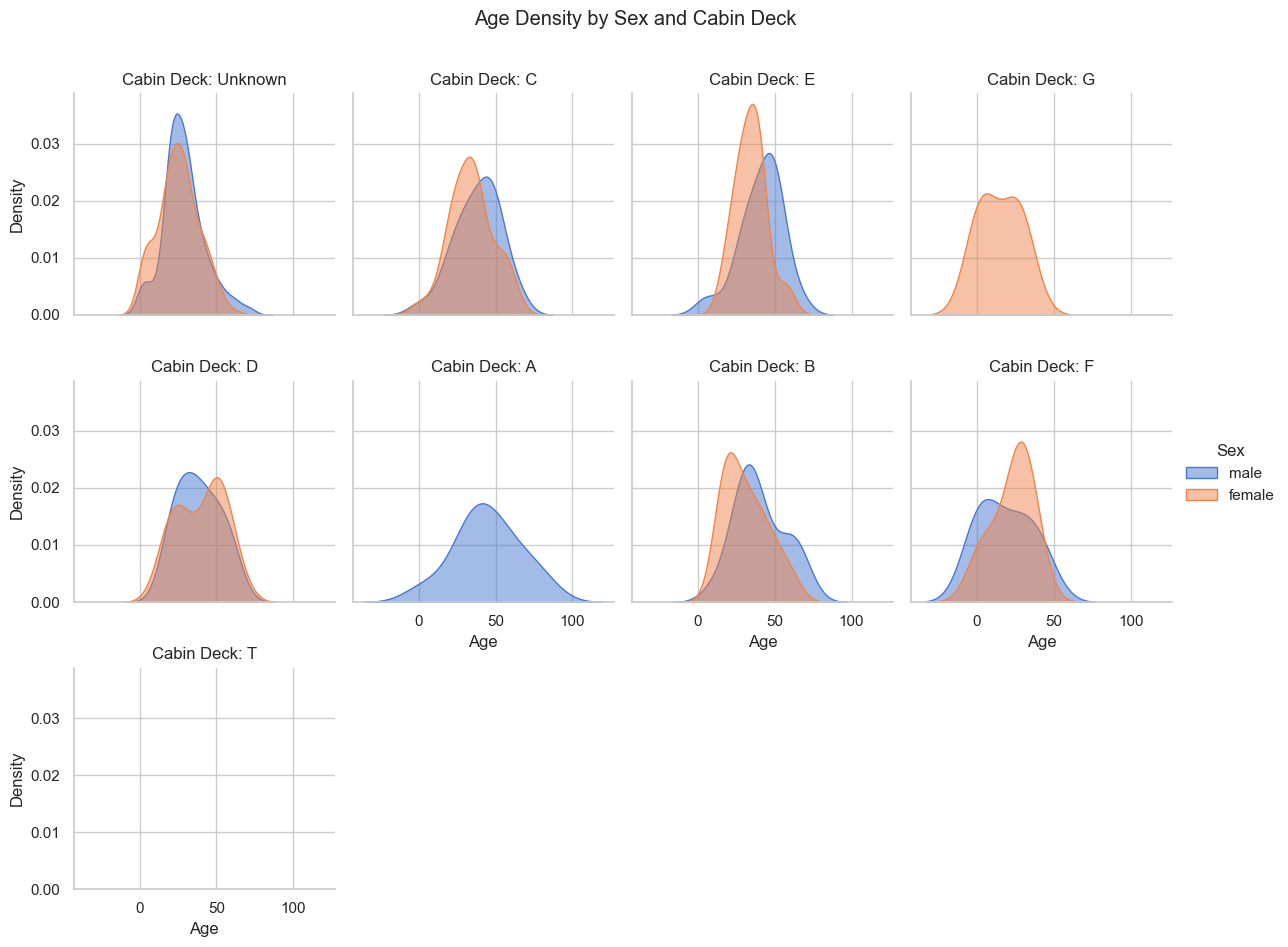

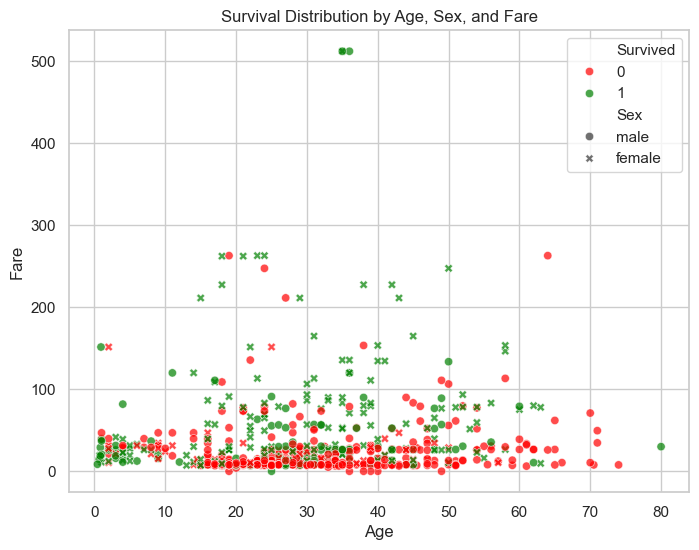

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/train.csv', sep='\t')
df.head()

# Basic info
print(df.info())


# Simplify the Cabin column: use only the first letter (deck)
df['CabinDeck'] = df['Cabin'].astype(str).str[0]
df['CabinDeck'] = df['CabinDeck'].replace('n', 'Unknown')  # if 'nan' became 'n'

# Drop rows missing age for visualization
df_viz = df.dropna(subset=['Age'])

sns.set(style="whitegrid", palette="muted")

# Create a grid: one subplot per CabinDeck
g = sns.FacetGrid(df_viz, col="CabinDeck", hue="Sex", col_wrap=4, height=3, sharex=True, sharey=True)
g.map(sns.kdeplot, "Age", common_norm=False, fill=True, alpha=0.5)

# Add titles and labels
g.add_legend()
g.set_axis_labels("Age", "Density")
g.set_titles("Cabin Deck: {col_name}")
plt.suptitle("Age Density by Sex and Cabin Deck", y=1.05)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_viz,
    x="Age", y="Fare",
    hue="Survived", style="Sex",
    palette={0: "red", 1: "green"},
    alpha=0.7
)
plt.title("Survival Distribution by Age, Sex, and Fare")
plt.show()


In [3]:
print(df.columns)

Index(['PassengerId\tSurvived\tPclass\tName\tSex\tAge\tSibSp\tParch\tTicket\tFare\tCabin\tEmbarked'], dtype='object')
